In [20]:
import numpy as np
import networkx as nx
from networkx.algorithms import community #use community algorithm to detect communities within a graph
import itertools
import matplotlib.pyplot as plt
import pandas as pd

depts = pd.read_csv("email-Eu-core-department-labels.txt", sep = ' ')
depts2 = np.array(depts)

In [28]:
freq = [0]*42

for x in depts2:
    freq[x[1]] = freq[x[1]] + 1
print(sorted(freq))

[1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 8, 8, 9, 9, 10, 10, 12, 13, 13, 13, 14, 15, 18, 19, 22, 25, 25, 26, 27, 28, 29, 29, 32, 35, 39, 49, 51, 55, 61, 64, 92, 109]


In [30]:
#taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

number of communities: 7


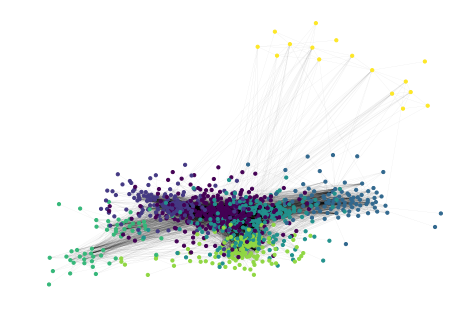

In [42]:
FileName="email-Eu-core.txt"
Graphtype=nx.Graph()   # use net.DiGraph() for directed graph

# How to read from a file. Note: if your egde weights are int, change float to int.
G = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

import community

largest = nx.connected_components(G)

G.remove_node(580)
G.remove_node(633)
G.remove_node(648)
G.remove_node(653)
G.remove_node(658)
G.remove_node(660)
G.remove_node(670)
G.remove_node(675)
G.remove_node(684)
G.remove_node(691)
G.remove_node(703)
G.remove_node(711)
G.remove_node(731)
G.remove_node(732)
G.remove_node(744)
G.remove_node(746)
G.remove_node(772)
G.remove_node(798)
G.remove_node(808)

partition = community.best_partition(G)
pos = community_layout(G, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G, pos, node_color=list(partition.values()), node_size = 10, arrowsize = 4, width = 0.02)
plt.savefig('Gall.png', dpi=1000)